In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['OPENBLAS_NUM_THREADS'] = '8'  # noqa, must go before jax

import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
from collections import defaultdict
from tqdm import tqdm


# Check full suite

In [2]:
wdir = '/home/mattho/git/ltu-cmass/data'
# path_to_cal = pjoin(wdir, 'calib_1gpch_z0.5')
path_to_cal = pjoin(wdir, 'inf_3gpch')

sim = 'borgpm'
simdir = pjoin(path_to_cal, sim, 'L3000-N384')

In [3]:
# check for run status from files

check_for = 'rho.npy'  # file to check if exists

lhids = range(2000)  # os.listdir(simdir)
counter = defaultdict(int)
bad = []
for lh in lhids:
    lh = str(lh)
    lpath = pjoin(simdir, lh)

    # count files
    if os.path.exists(lpath):
        files = os.listdir(lpath)
        for f in files:
            counter[f] += 1
        
        # check for file
        if check_for not in files:
            bad.append(lh)
    else:
        bad.append(lh)

print(' '.join(bad))
dict(counter)

{'rho.npy': 2000,
 'fvel.npy': 2000,
 'config.yaml': 2000,
 'halo_pos.npy': 1988,
 'halo_vel.npy': 1988,
 'halo_mass.npy': 1988,
 'halo_cuboid_pos.npy': 1988,
 'halo_cuboid_vel.npy': 1988,
 'hod': 1988,
 'obs': 1988,
 'Pk': 1987,
 'halo_count.npy': 1}

# Check individuals

In [4]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from os.path import join as pjoin
import pandas as pd

mpl.style.use('../matts_tests/style.mcstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
lhid = 1200
wdir = '../data'
solver='borgpm'
source_dir = pjoin(wdir, f'inf_3gpch/{solver}/L3000-N384', str(lhid))

lhpath = pjoin('../params', 'latin_hypercube_params.txt')
lh_lookup = pd.read_csv(
    lhpath, delimiter=' ', header=None, 
    names=['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma_8'])
print(lh_lookup.iloc[lhid+1])

Omega_m    0.27790
Omega_b    0.05307
h          0.59130
n_s        0.86570
sigma_8    0.85410
Name: 1201, dtype: float64


In [8]:
rho = np.load(pjoin(source_dir, 'rho.npy'))
fvel = np.load(pjoin(source_dir, 'fvel.npy'))
hpos = np.load(pjoin(source_dir, 'halo_pos.npy'))
hcpos = np.load(pjoin(source_dir, 'halo_cuboid_pos.npy'))
gcpos = np.load(pjoin(source_dir, 'hod', 'hod0_pos.npy'))
grdz = np.load(pjoin(source_dir, 'obs', 'rdz0.npy'))
Pk = np.load(pjoin(source_dir, 'Pk', 'Pk0.npz'))

In [9]:
di = np.array([65, 70])
dx = (3000/384)*di

(-0.5, 383.5, -0.5, 383.5)

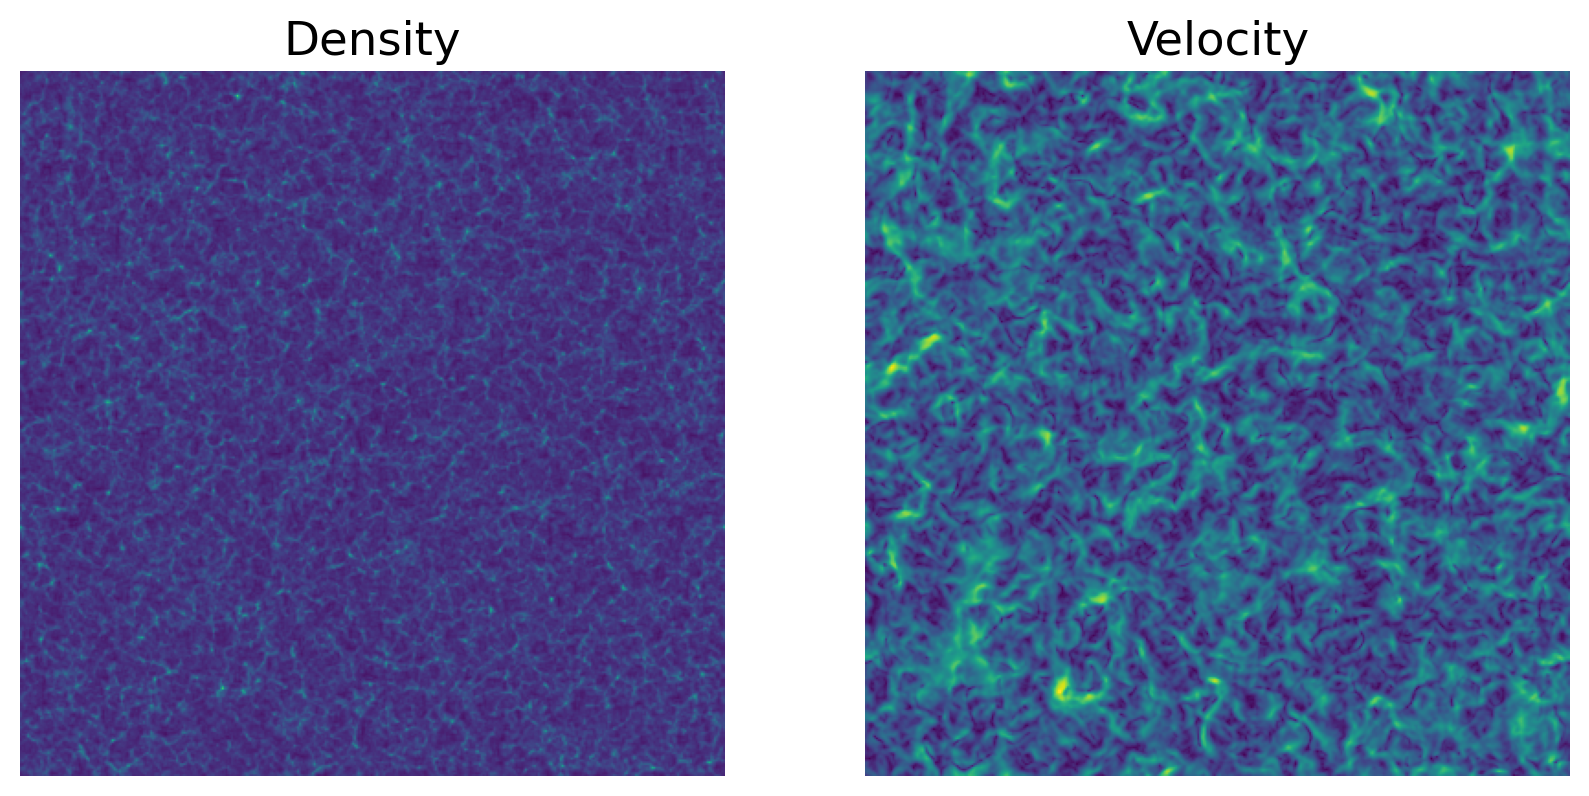

In [10]:
f, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(np.mean(rho[di[0]:di[1]], axis=0), vmin=-1, vmax=5)
axs[0].set_title('Density')
axs[0].axis('off')
axs[1].imshow(np.linalg.norm(np.mean(fvel[di[0]:di[1]], axis=0), axis=-1))
axs[1].set_title('Velocity')
axs[1].axis('off')


(0.0, 3000.0, 0.0, 3000.0)

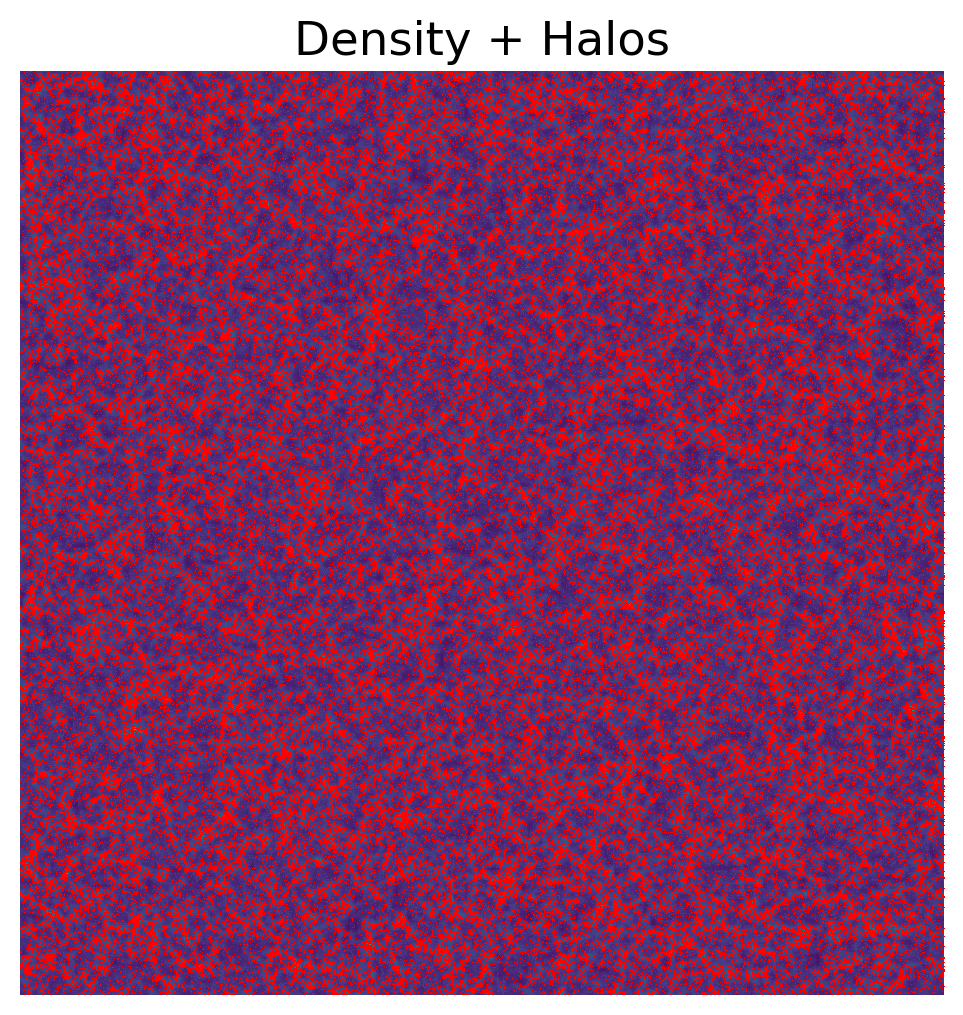

In [11]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.imshow(np.mean(rho[di[0]:di[1]], axis=0).T, vmin=-1, vmax=5,
              extent=[0,3e3,0,3e3], origin='lower')

mask = (dx[0] < hpos[:,0]) & (hpos[:,0] < dx[1])
ax.plot(hpos[mask,1], hpos[mask,2], 'r,', alpha=1)
ax.set_title('Density + Halos')
ax.axis('off')

(-149.99739767513822,
 3149.976601340185,
 -106.06154538809788,
 2227.385603723838)

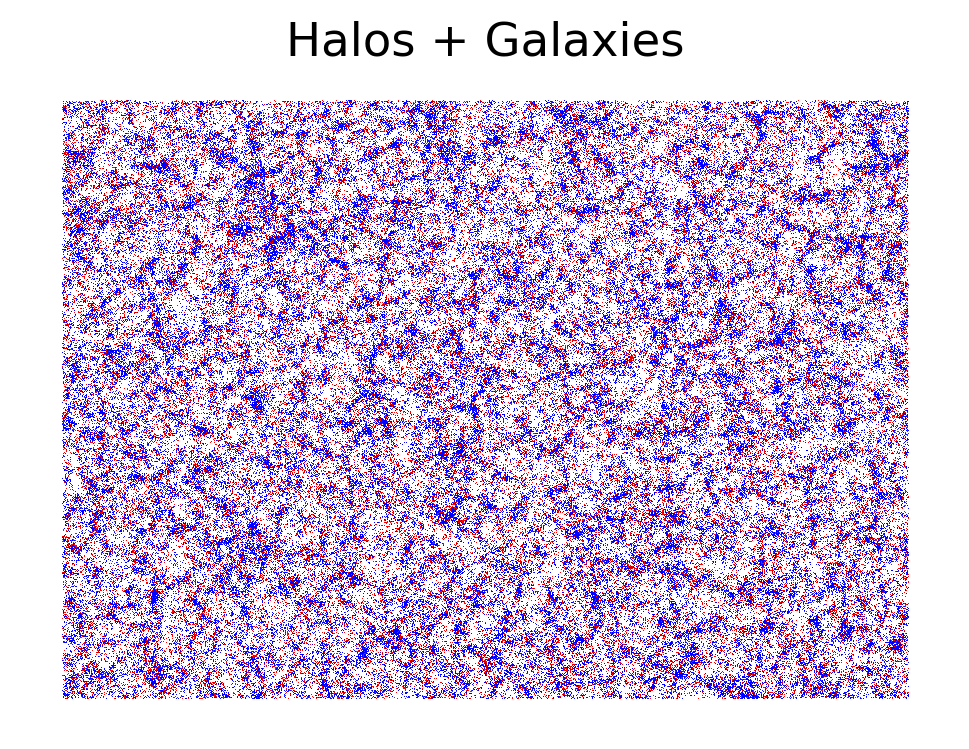

In [12]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

mask = (dx[0] < hcpos[:,0]) & (hcpos[:,0] < dx[1])
ax.plot(hcpos[mask,1], hcpos[mask,2], 'r,', alpha=1)
mask = (dx[0] < gcpos[:,0]) & (gcpos[:,0] < dx[1])
ax.plot(gcpos[mask,1], gcpos[mask,2], 'b,', alpha=1)
ax.set_title('Halos + Galaxies')
ax.set_aspect('equal')
ax.axis('off')

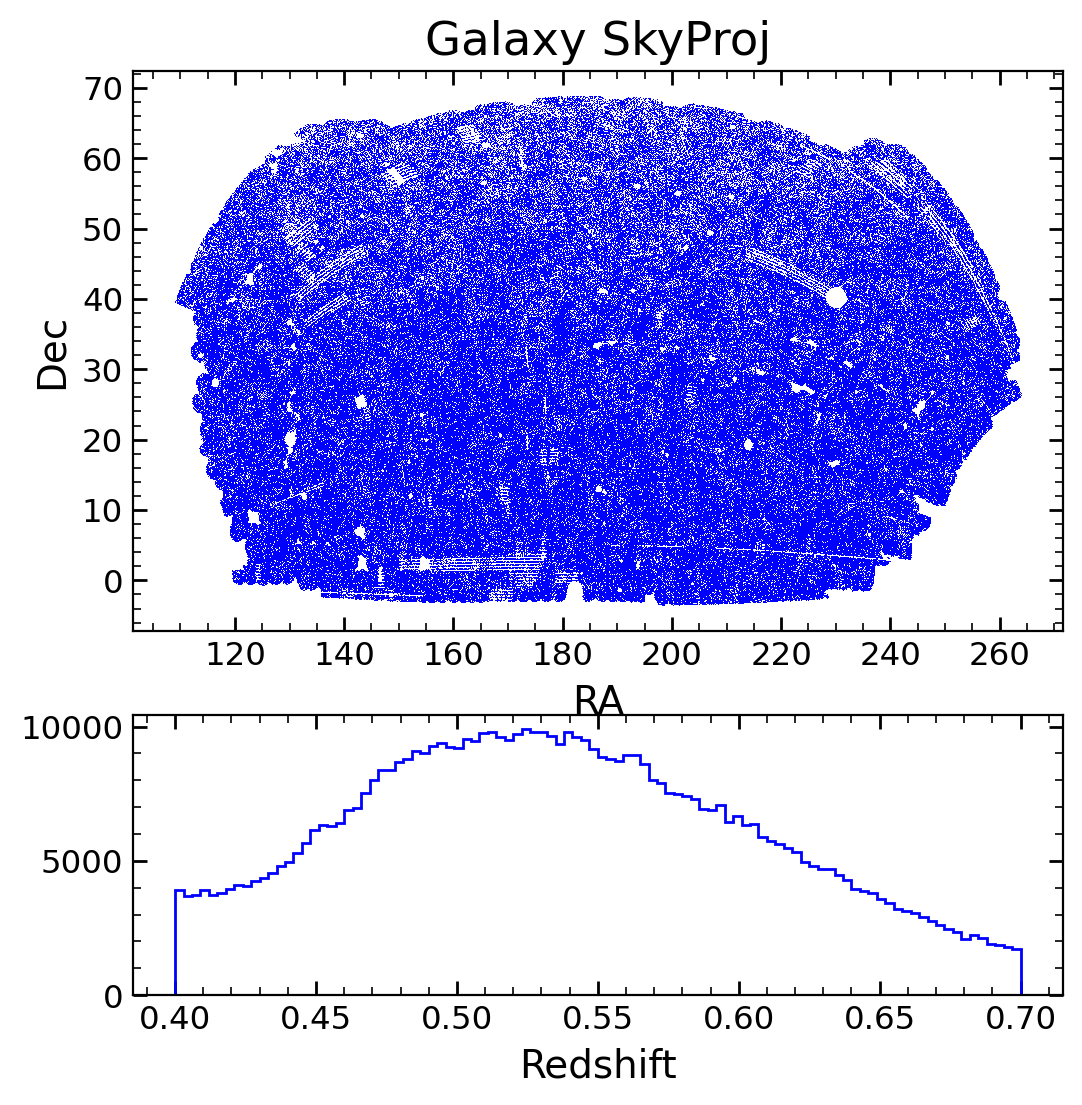

In [14]:
f, axs = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [2,1]})

axs[0].plot(grdz[:,0], grdz[:,1], 'b,')
axs[0].set_title('Galaxy SkyProj')
axs[0].set_xlabel('RA')
axs[0].set_ylabel('Dec')

axs[1].hist(grdz[:,2], bins=100, histtype='step', color='b')
axs[1].set_xlabel('Redshift');

Text(0, 0.5, 'P(k)')

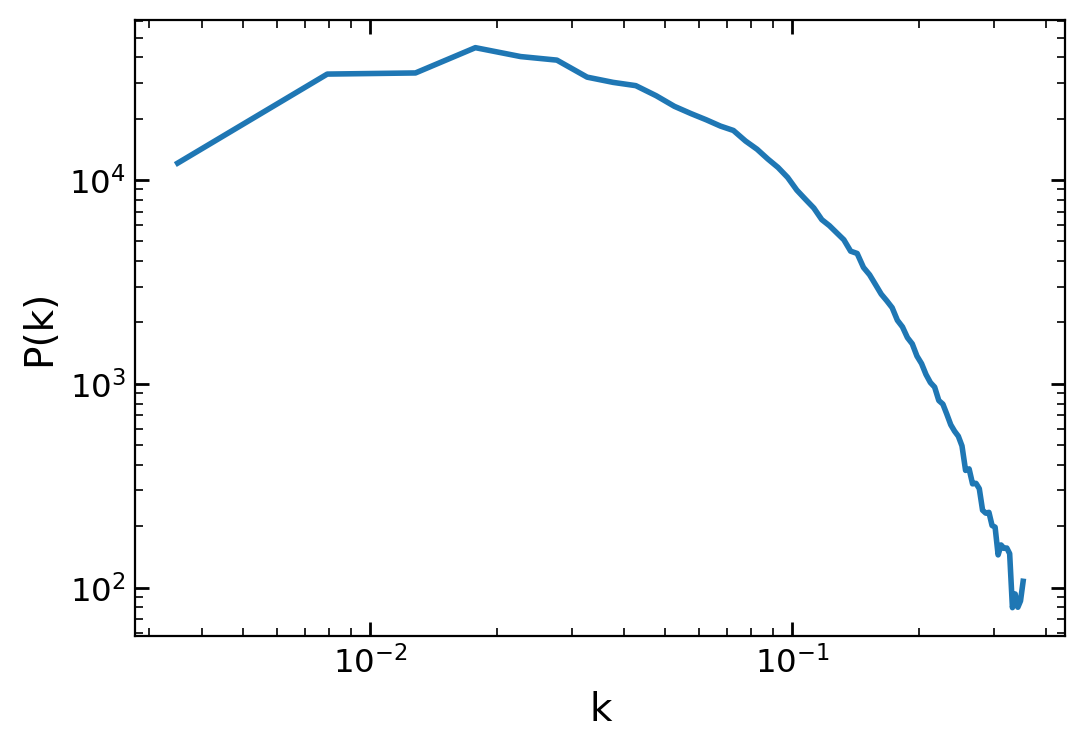

In [15]:
k = Pk['k_gal']
P0 = Pk['p0k_gal']

f, ax = plt.subplots(1, 1, figsize=(6,4))
ax.loglog()
ax.plot(k, P0)
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
